In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [2]:
# Download latest version
#path = kagglehub.dataset_download("andrewmvd/sp-500-stocks")


In [ ]:
# Print all files in the dataset path
#print(os.listdir(path))

In [4]:
#csv_file_path = os.path.join(path, 'sp500_stocks.csv')
#csv_file_path2 = os.path.join(path, 'sp500_companies.csv')
#csv_file_path3 = os.path.join(path, 'sp500_index.csv')
#data = pd.read_csv(csv_file_path)
#df = pd.read_csv(csv_file_path2)
#sp = pd.read_csv(csv_file_path3)

In [2]:
data = pd.read_csv('sp500_stocks.csv')
df = pd.read_csv('sp500_companies.csv')
sp = pd.read_csv('sp500_index.csv')

In [3]:
data.columns = [col.lower().replace(" ", "_")for col in data.columns] #snake_case
df.columns = [col.lower().replace(" ", "_")for col in df.columns] #snake_case
sp.columns = [col.lower().replace(" ", "_")for col in sp.columns] #snake_case

In [4]:
# Copies 
data2 = data.copy()
df2 = df.copy()
sp2 = sp.copy()

In [ ]:
data2.dtypes

In [5]:
data.isna().sum()

date              0
symbol            0
adj_close    101626
close        101626
high         101626
low          101626
open         101626
volume       101626
dtype: int64

In [6]:
# Delete Columns 
data2.drop(columns=['high', 'low', 'open','close'], inplace=True)

In [7]:
data2.isna().sum()

date              0
symbol            0
adj_close    101626
volume       101626
dtype: int64

In [8]:
# Delete NaN. TELL WHY I'M dropping 
data2.dropna(how='any', inplace=True)

In [9]:
data2.isna().sum()

date         0
symbol       0
adj_close    0
volume       0
dtype: int64

In [10]:
# Change to datetime. 
data2['date'] = pd.to_datetime(data2['date'])

In [11]:
data2['year'] = data2['date'].dt.year
data2['month'] = data2['date'].dt.month
data2['day'] = data2['date'].dt.day

In [12]:
cols = ['year', 'month', 'day', 'symbol', 'adj_close', 'volume']
data2 = data2[cols]
data2.head(3)

,year,month,day,symbol,adj_close,volume
0,2010,1,4,MMM,43.783867,3640265.0
1,2010,1,5,MMM,43.509628,3405012.0
2,2010,1,6,MMM,44.126682,6301126.0


In [13]:
# Drop rows where year is between 2010 and 2013 because SP500 for comparison we do have 2014. 
data2.drop(data2[(data2['year'] >= 2010) & (data2['year'] <= 2014)].index, inplace=True)

In [14]:
# Chat helped. 
annual_returns = data2.groupby(['symbol', 'year']).apply(lambda group: (group['adj_close'].iloc[-1] / group['adj_close'].iloc[0]) - 1).reset_index(name='annual_return').round(4)

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_5587/292607746.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_returns = data2.groupby(['symbol', 'year']).apply(lambda group: (group['adj_close'].iloc[-1] / group['adj_close'].iloc[0]) - 1).reset_index(name='annual_return').round(4)


In [15]:
pivoted_df = annual_returns.pivot(index='symbol', columns='year', values='annual_return')
pivoted_df.sample(3)

year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
symbol,,,,,,,,,,
AMP,-0.1774,0.1000,0.5513,-0.3699,0.5851,0.1794,0.6314,0.0408,0.2427,0.5019
TSN,0.3485,0.1768,0.3184,-0.3245,0.7481,-0.2648,0.4052,-0.2875,-0.1549,0.1280
NWS,-0.0609,-0.1230,0.3987,-0.3031,0.2679,0.2194,0.2638,-0.1858,0.4064,0.2705


In [16]:
pivoted_df = pivoted_df.rename(columns={2015: 'ar_2015',2016:'ar_2016',2017: 'ar_2017', 
                                          2018:'ar_2018', 2019: 'ar_2019',2020: 'ar_2020', 2021: 'ar_2021', 2022:'ar_2022', 2023:'ar_2023',2024: 'ar_2024'})

In [ ]:
cols = ['exchange', 'symbol', 'shortname','longname','sector','industry',
        'marketcap','ebitda', 'revenuegrowth', 'city', 'state', 'country',   
        'fulltimeemployees', 'longbusinesssummary', 'weight', 'mean_2015', 'mean_2016', 'mean_2017', 'mean_2018', 'mean_2019',
        'mean_2020', 'mean_2021', 'mean_2022', 'mean_2023', 'mean_2024', 'currentprice']

In [17]:
defi = pd.merge (df, pivoted_df, on='symbol')
defi

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,revenuegrowth,...,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,242.84,3670720643072,1.346610e+11,0.061,...,-0.0208,0.1238,0.4804,-0.0705,0.8874,0.7824,0.3806,-0.2820,0.5480,0.3145
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,142.44,3488355713024,6.118400e+10,1.224,...,0.6645,2.3292,0.9043,-0.3285,0.7341,1.1802,1.2448,-0.5144,2.4610,1.9580
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,443.57,3297889746944,1.365520e+11,0.160,...,0.2188,0.1651,0.3974,0.2022,0.5826,0.3994,0.5579,-0.2769,0.5835,0.2050
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,227.03,2387220627456,1.115830e+11,0.110,...,1.1907,0.1772,0.5517,0.2632,0.2006,0.7160,0.0464,-0.5071,0.7704,0.5142
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,176.49,2149065949184,1.234700e+11,0.151,...,0.4500,0.0404,0.3311,-0.0276,0.2784,0.2812,0.6743,-0.3884,0.5711,0.2646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,33.80,7392059904,1.882000e+09,-0.048,...,-0.2022,-0.0517,0.2918,-0.3189,0.2572,-0.1037,0.2019,-0.0940,0.0245,-0.0471
499,NYQ,HII,"Huntington Ingalls Industries,","Huntington Ingalls Industries, Inc.",Industrials,Aerospace & Defense,187.95,7354351616,1.071000e+09,-0.024,...,0.1491,0.5029,0.2615,-0.1545,0.3244,-0.3181,0.1651,0.2680,0.1633,-0.2620
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,56.58,7063221248,7.033000e+08,0.085,...,-0.3028,0.5106,0.6741,-0.2186,0.5627,0.1725,-0.0103,0.1542,-0.4807,-0.1023
501,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,68.33,6459010048,6.731300e+08,-0.052,...,-0.2770,0.0396,0.2590,-0.1183,0.8998,0.4339,-0.0498,-0.4315,0.2633,-0.3726


In [18]:
cols = ['exchange', 'symbol', 'shortname','longname','sector','industry',
        'marketcap','ebitda', 'revenuegrowth', 'city', 'state', 'country',   
        'fulltimeemployees', 'longbusinesssummary', 'weight', 'ar_2015', 'ar_2016', 'ar_2017', 'ar_2018', 'ar_2019',
        'ar_2020', 'ar_2021', 'ar_2022', 'ar_2023', 'ar_2024', 'currentprice']

In [19]:
defi = defi[cols]

In [20]:
cat = defi.select_dtypes(exclude='number')
cat.head(5)

,exchange,symbol,shortname,longname,sector,industry,city,state,country,longbusinesssummary
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,Cupertino,CA,United States,"Apple Inc. designs, manufactures, and markets ..."
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,Santa Clara,CA,United States,NVIDIA Corporation provides graphics and compu...
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,Redmond,WA,United States,Microsoft Corporation develops and supports so...
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,Seattle,WA,United States,"Amazon.com, Inc. engages in the retail sale of..."
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,Mountain View,CA,United States,Alphabet Inc. offers various products and plat...


In [21]:
num = defi.select_dtypes(include='number')
num.head(5)

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
0,3670720643072,1.346610e+11,0.061,164000.0,0.064589,-0.0208,0.1238,0.4804,-0.0705,0.8874,0.7824,0.3806,-0.2820,0.5480,0.3145,242.84
1,3488355713024,6.118400e+10,1.224,29600.0,0.061381,0.6645,2.3292,0.9043,-0.3285,0.7341,1.1802,1.2448,-0.5144,2.4610,1.9580,142.44
2,3297889746944,1.365520e+11,0.160,228000.0,0.058029,0.2188,0.1651,0.3974,0.2022,0.5826,0.3994,0.5579,-0.2769,0.5835,0.2050,443.57
3,2387220627456,1.115830e+11,0.110,1551000.0,0.042005,1.1907,0.1772,0.5517,0.2632,0.2006,0.7160,0.0464,-0.5071,0.7704,0.5142,227.03
4,2149065949184,1.234700e+11,0.151,181269.0,0.037815,0.4500,0.0404,0.3311,-0.0276,0.2784,0.2812,0.6743,-0.3884,0.5711,0.2646,176.49


In [23]:
defi.describe()

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
count,5.030000e+02,4.740000e+02,500.000000,4.940000e+02,503.000000,475.000000,480.000000,482.000000,485.000000,491.000000,495.000000,495.000000,497.000000,499.000000,503.000000,503.000000
mean,1.129853e+11,7.031397e+09,0.070484,5.774496e+04,0.001988,0.045306,0.197734,0.258852,-0.034976,0.352786,0.192008,0.328778,-0.085353,0.195019,0.215239,230.293300
std,3.399129e+11,1.622777e+10,0.180071,1.394693e+05,0.005981,0.253423,0.277769,0.260448,0.225112,0.317066,0.548745,0.295113,0.279833,0.356690,0.382605,521.997583
min,5.637307e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000099,-0.753000,-0.710600,-0.430800,-0.576200,-0.543300,-0.580300,-0.350500,-0.710700,-0.480700,-0.652500,8.560000
25%,2.036663e+10,1.623194e+09,0.002000,1.020000e+04,0.000358,-0.107050,0.047800,0.094325,-0.192900,0.185550,-0.051000,0.131250,-0.266900,-0.028700,0.004500,71.545000
50%,3.803281e+10,2.941705e+09,0.050000,2.159500e+04,0.000669,0.040700,0.177950,0.223250,-0.037800,0.328700,0.123900,0.306900,-0.114600,0.127500,0.167400,126.820000
75%,8.419720e+10,6.017250e+09,0.109000,5.476225e+04,0.001482,0.177300,0.310375,0.386175,0.093100,0.478200,0.302250,0.472350,0.057700,0.324050,0.371450,239.190000
max,3.670721e+12,1.495470e+11,1.632000,2.100000e+06,0.064589,1.722800,3.093900,1.427200,1.065900,4.311000,7.200500,1.900200,1.071300,2.461000,3.604300,8946.330000


In [24]:
frequ = cat.sector.value_counts()
table = cat.sector.value_counts(normalize=True).round(2)

In [25]:
freq_table = pd.concat([frequ,table], axis = 1)
freq_table

,count,proportion
sector,,
Technology,82,0.16
Industrials,70,0.14
Financial Services,67,0.13
Healthcare,63,0.13
Consumer Cyclical,55,0.11
Consumer Defensive,37,0.07
Utilities,32,0.06
Real Estate,31,0.06
Communication Services,22,0.04


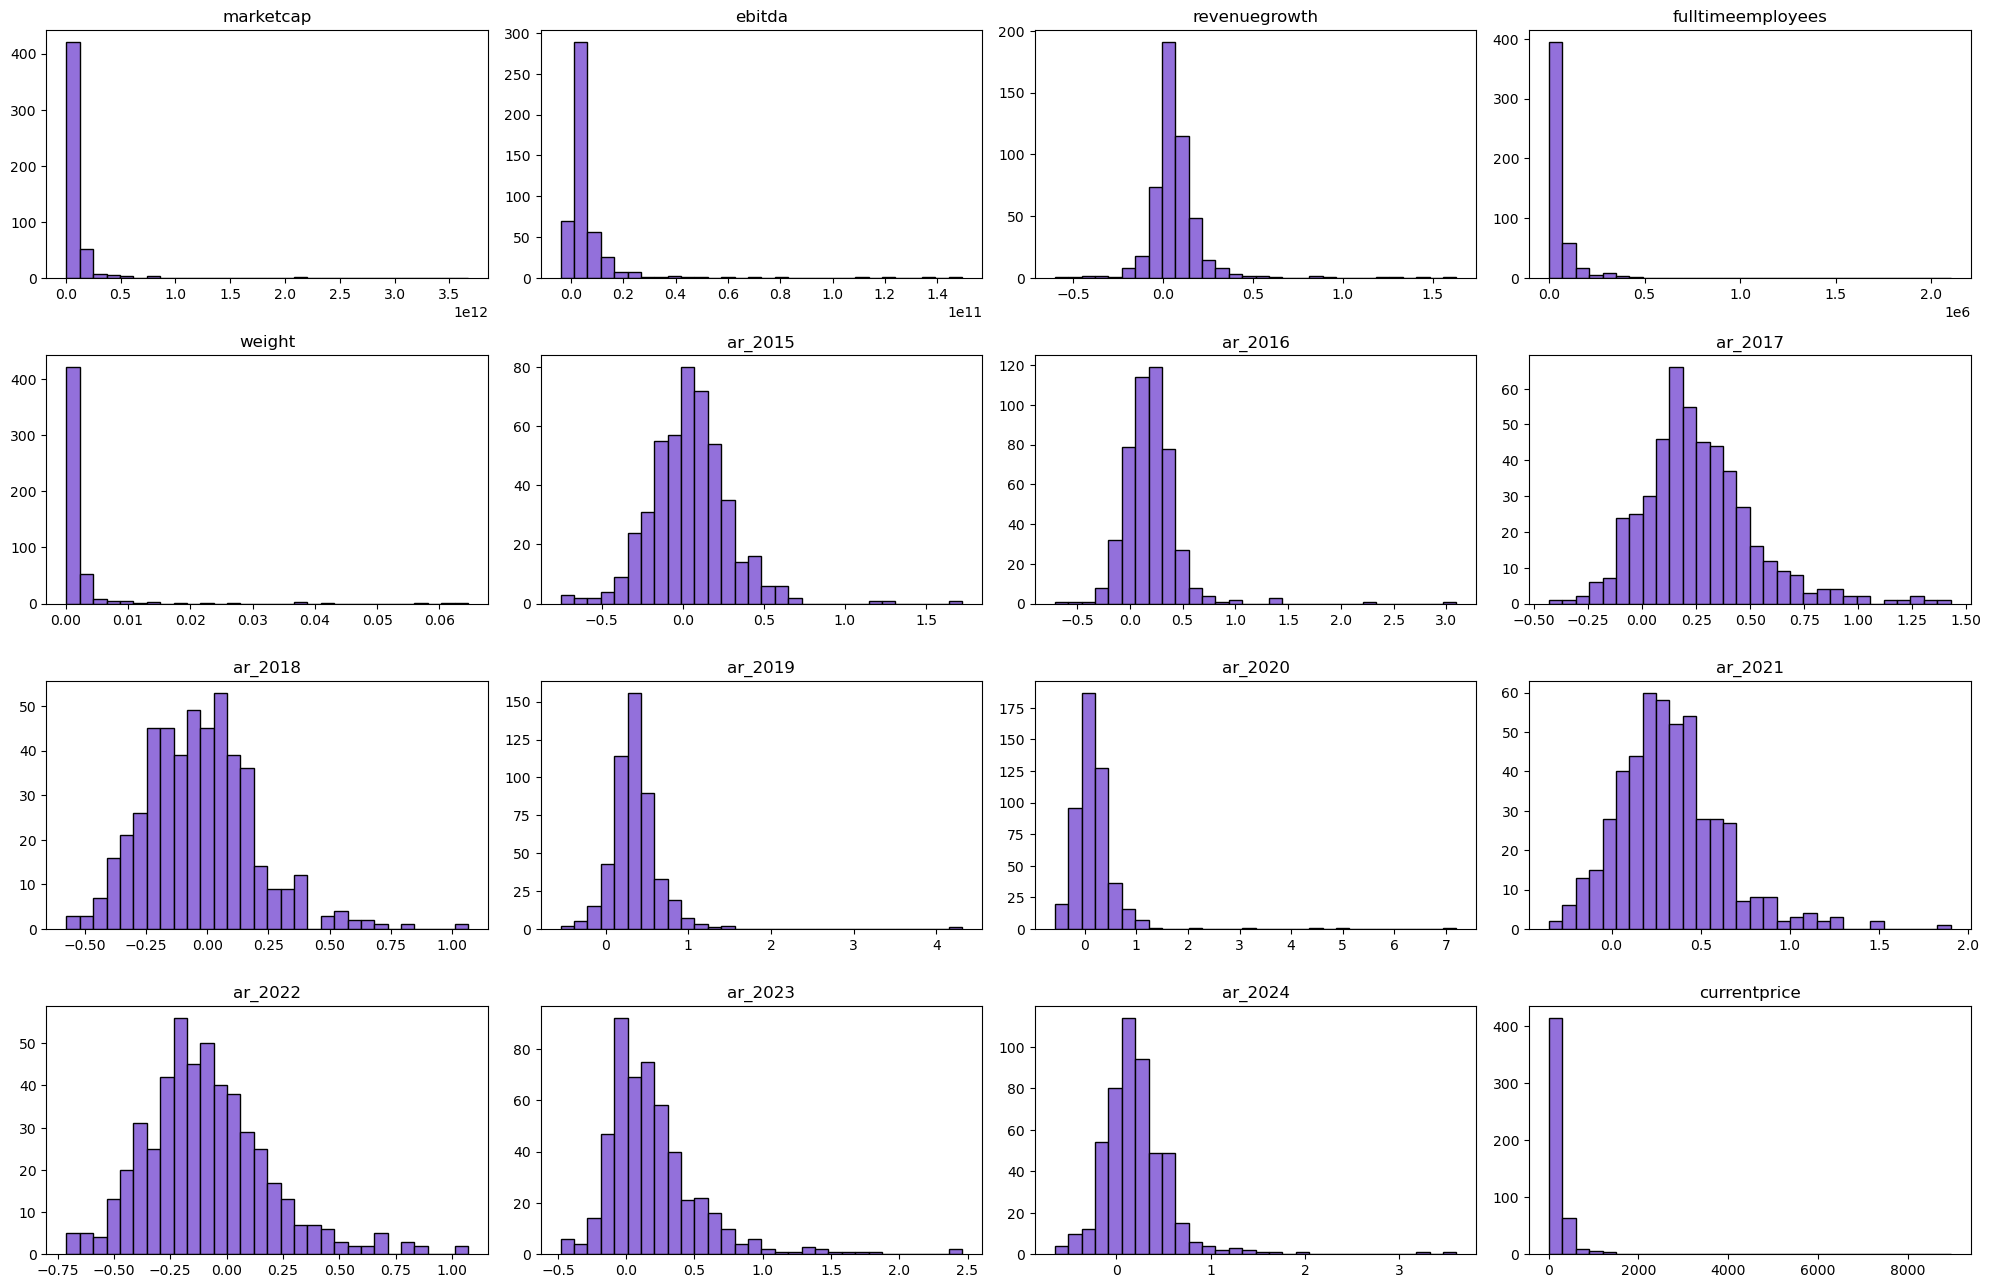

In [26]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

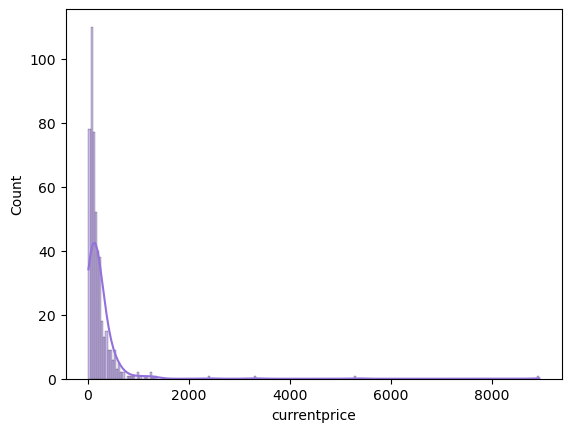

In [27]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(df["currentprice"], color=color, kde=True);

In [29]:
#Pearson 
num.corrwith(defi['currentprice'])

marketcap            0.043058
ebitda               0.012511
revenuegrowth        0.042384
fulltimeemployees   -0.007618
weight               0.043058
ar_2015              0.126672
ar_2016             -0.005434
ar_2017              0.154411
ar_2018              0.055847
ar_2019              0.085672
ar_2020              0.044220
ar_2021              0.033497
ar_2022              0.016112
ar_2023              0.162822
ar_2024              0.114593
currentprice         1.000000
dtype: float64

In [30]:
#Spearman
num.corrwith(defi['currentprice'], method='spearman').sort_values(ascending=False)[:5]

currentprice    1.000000
ar_2023         0.398856
marketcap       0.384317
weight          0.384317
ar_2020         0.331854
dtype: float64

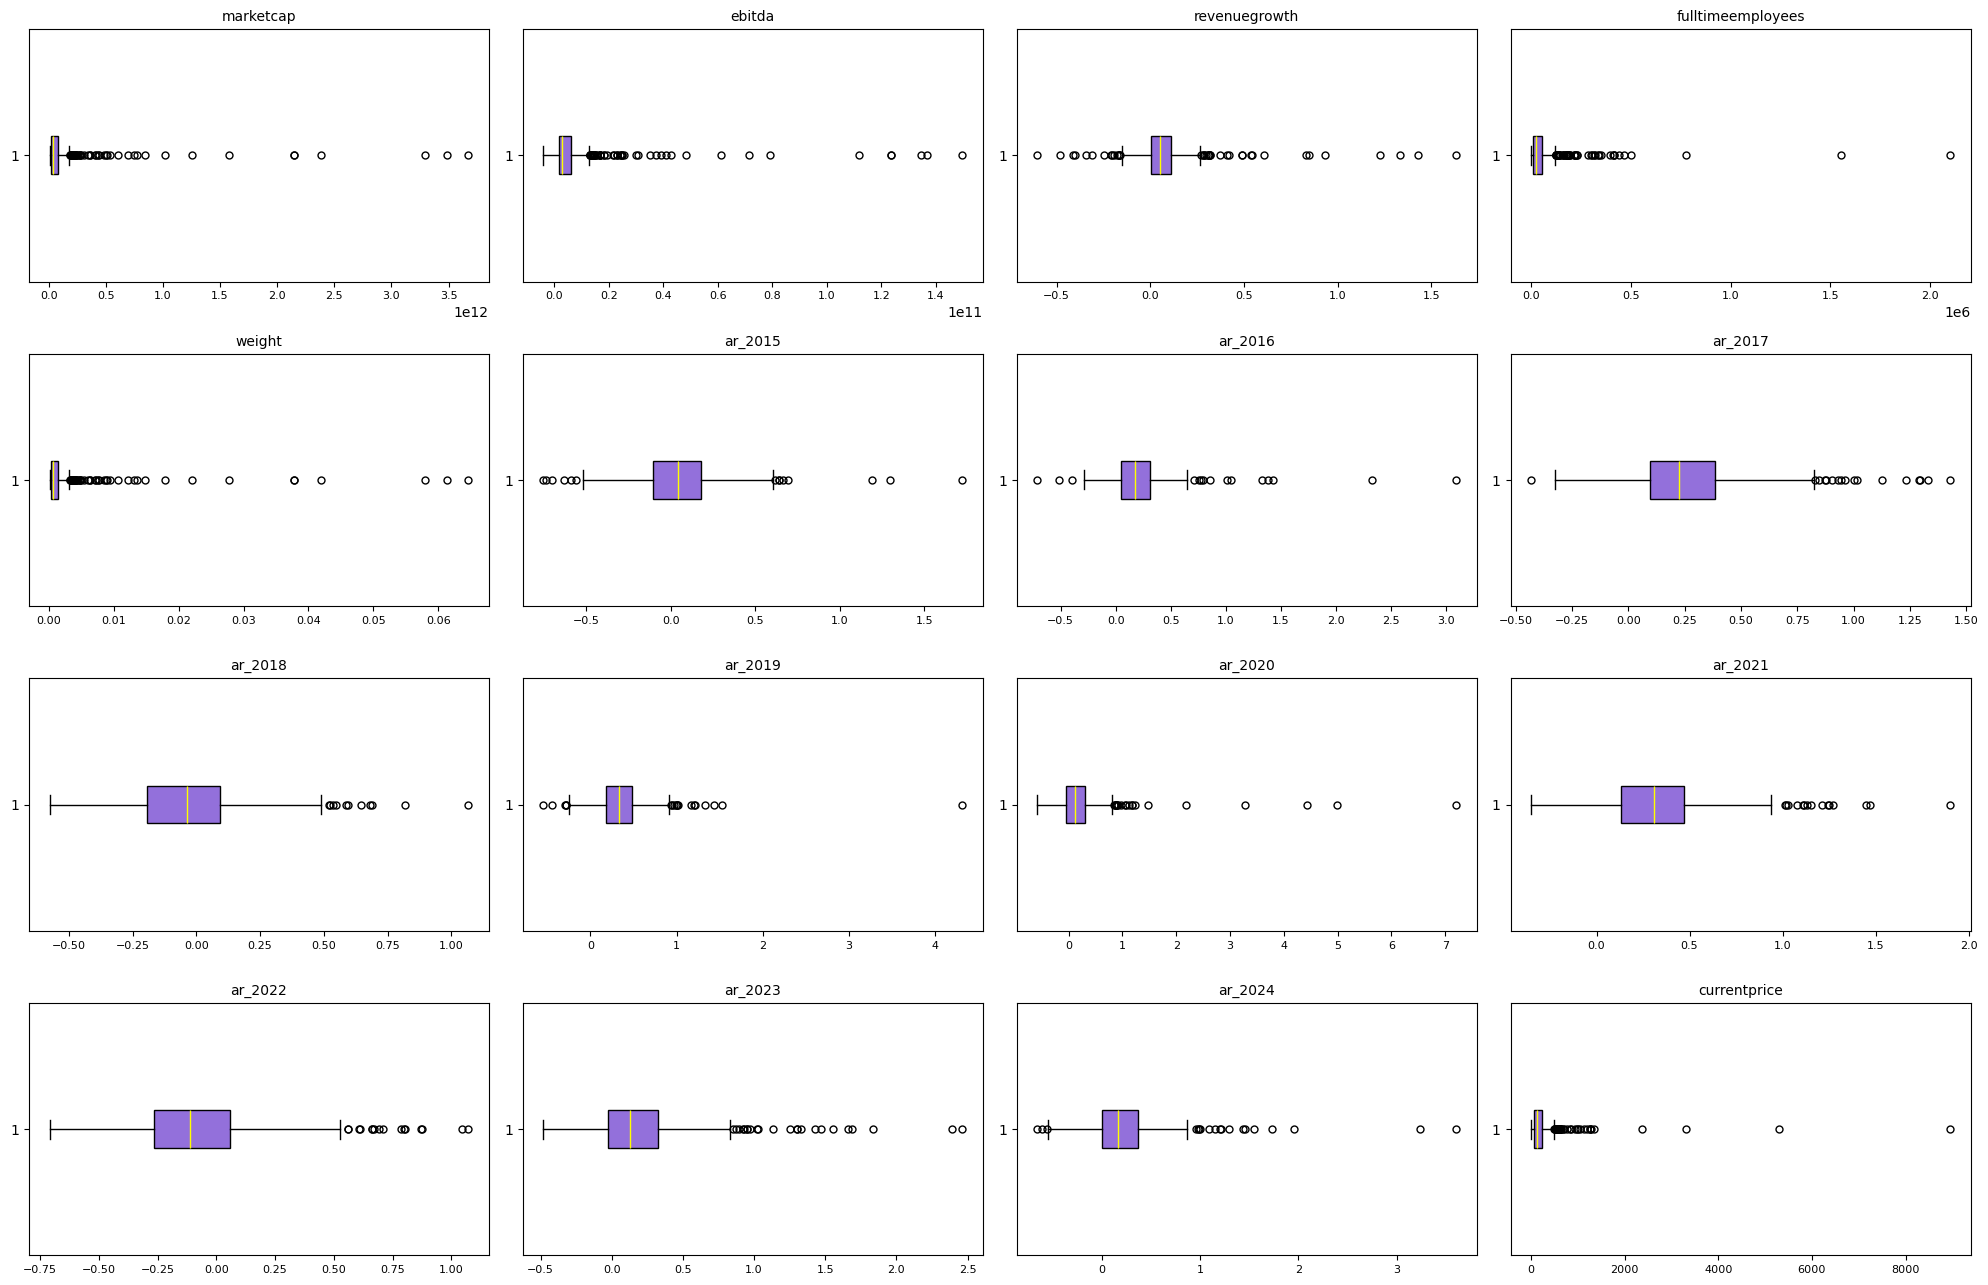

In [31]:
color = '#9370DB'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [33]:
num_corr = num.corr()
num_corr

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
marketcap,1.000000,0.849854,0.172996,0.342759,1.000000,0.193249,0.133161,0.137484,0.054559,0.063605,0.186006,0.103474,-0.123427,0.324378,0.185855,0.043058
ebitda,0.849854,1.000000,0.065370,0.403609,0.849854,0.119077,0.041054,0.027409,0.015690,-0.028116,0.017388,0.045742,-0.010294,0.146314,0.086087,0.012511
revenuegrowth,0.172996,0.065370,1.000000,-0.012331,0.172996,0.025595,0.152692,0.007961,0.061084,0.049525,0.060937,0.044603,-0.052831,0.367474,0.290595,0.042384
fulltimeemployees,0.342759,0.403609,-0.012331,1.000000,0.342759,0.082417,-0.046925,0.030057,0.005134,-0.035903,0.019590,-0.046901,-0.064023,0.039286,0.052600,-0.007618
weight,1.000000,0.849854,0.172996,0.342759,1.000000,0.193249,0.133161,0.137484,0.054559,0.063605,0.186006,0.103474,-0.123427,0.324378,0.185855,0.043058
ar_2015,0.193249,0.119077,0.025595,0.082417,0.193249,1.000000,-0.183902,0.140647,0.153540,0.012923,0.043814,-0.066283,-0.186867,0.114196,-0.065059,0.126672
ar_2016,0.133161,0.041054,0.152692,-0.046925,0.133161,-0.183902,1.000000,-0.021926,-0.062520,0.041836,-0.005660,0.164782,0.014437,0.156432,0.194349,-0.005434
ar_2017,0.137484,0.027409,0.007961,0.030057,0.137484,0.140647,-0.021926,1.000000,0.075360,0.312346,0.341680,-0.049351,-0.253892,0.228618,0.021337,0.154411
ar_2018,0.054559,0.015690,0.061084,0.005134,0.054559,0.153540,-0.062520,0.075360,1.000000,0.195853,0.195536,-0.055778,-0.091503,-0.032025,0.041198,0.055847
ar_2019,0.063605,-0.028116,0.049525,-0.035903,0.063605,0.012923,0.041836,0.312346,0.195853,1.000000,0.372098,-0.005062,-0.180804,0.133228,-0.027572,0.085672


Text(0.5, 1.0, 'Correlation Heatmap')

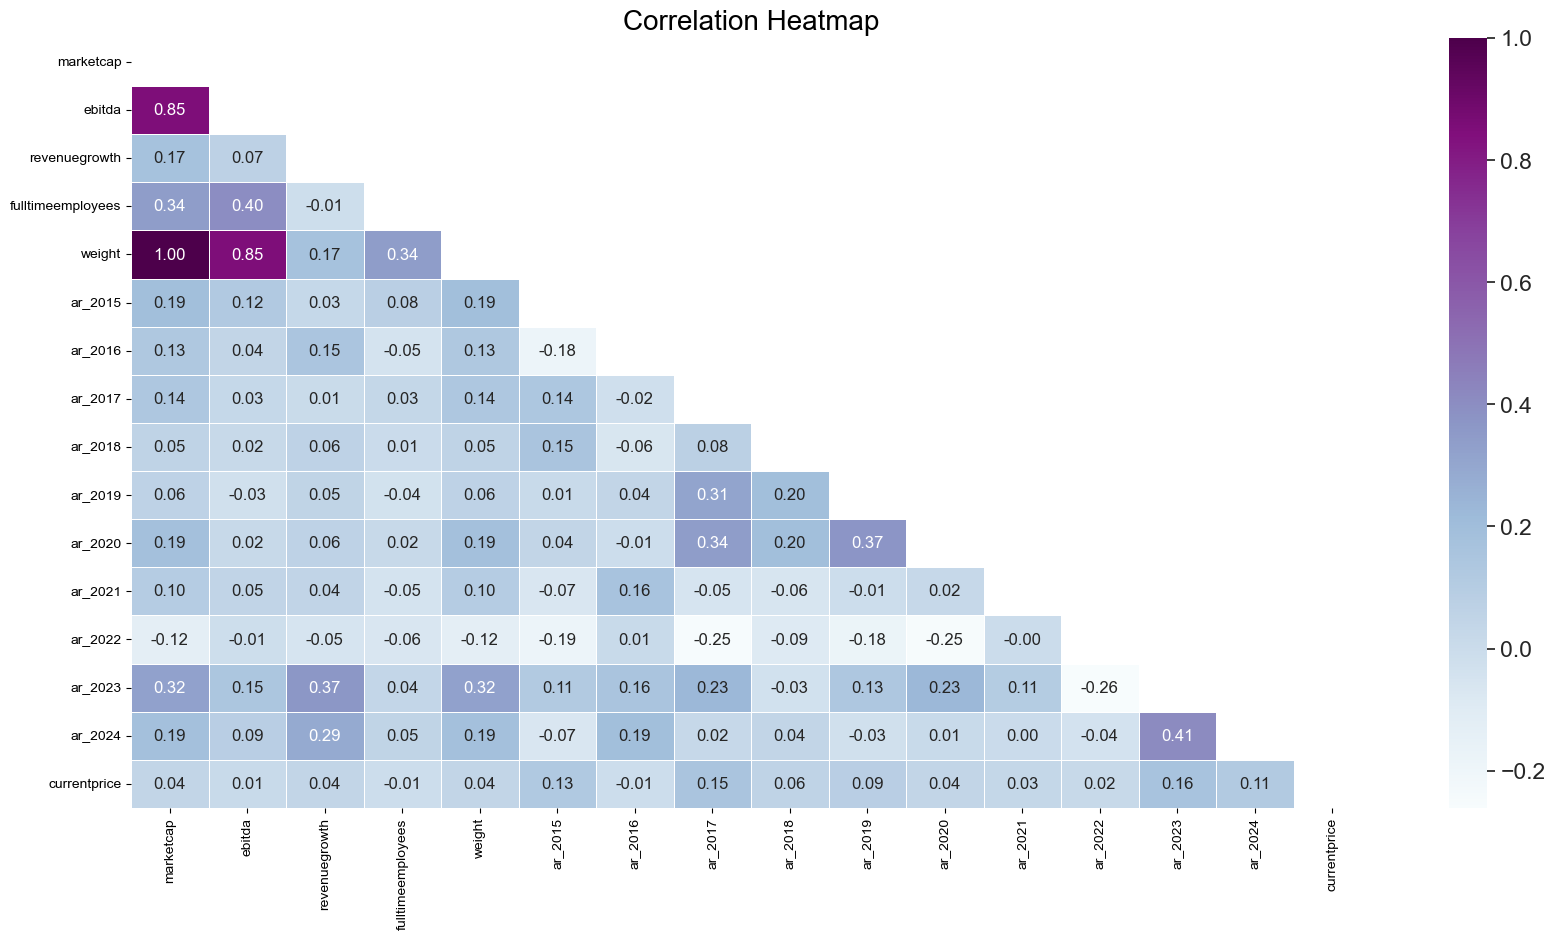

In [34]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

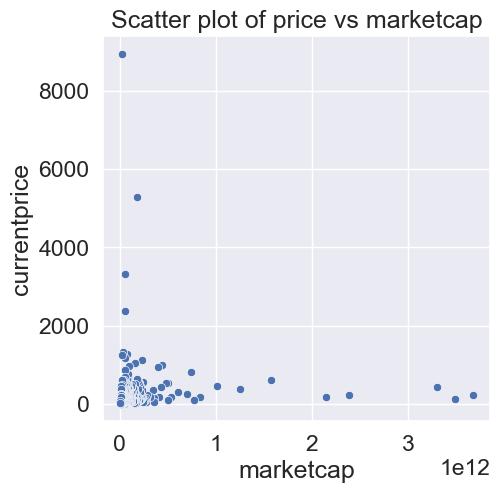

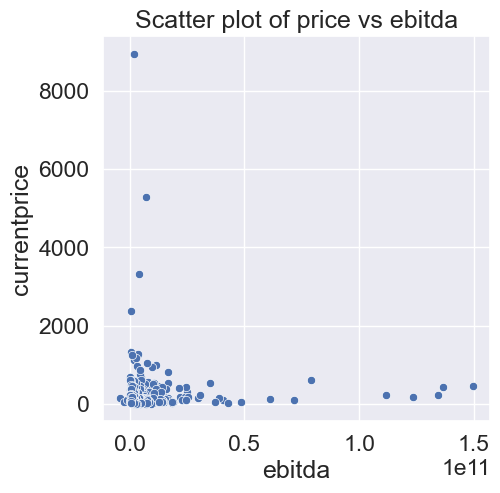

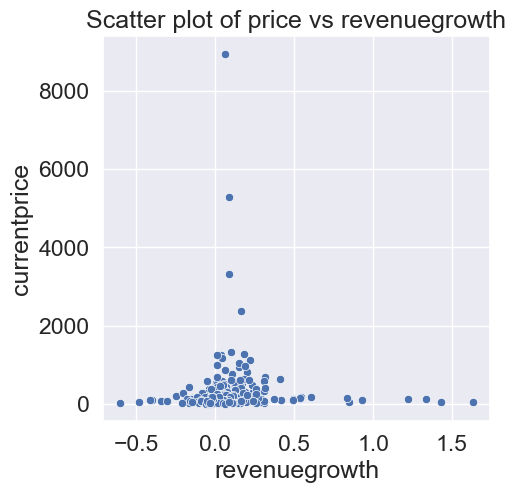

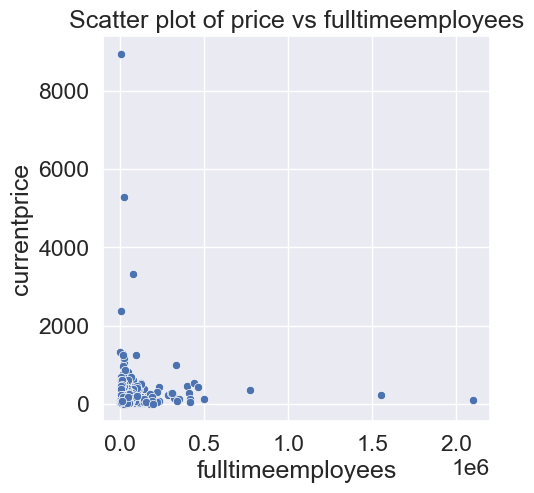

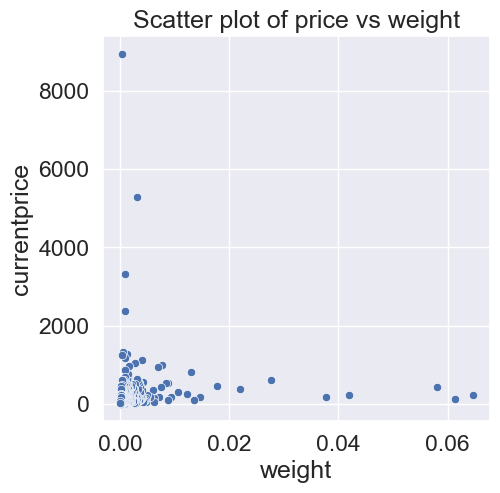

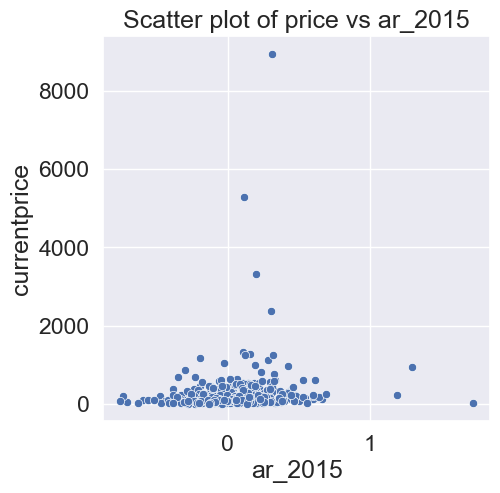

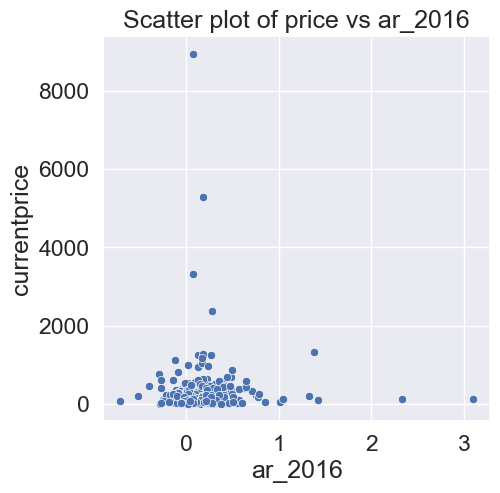

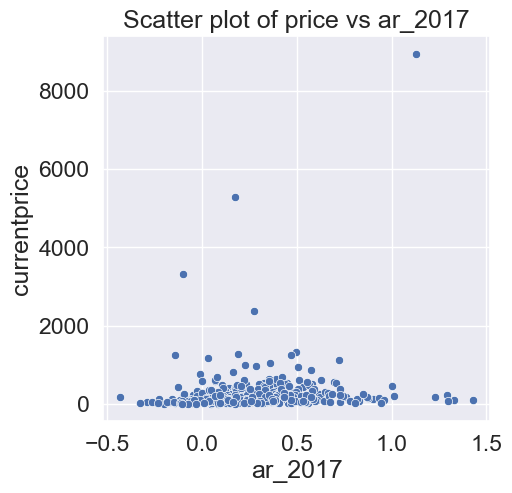

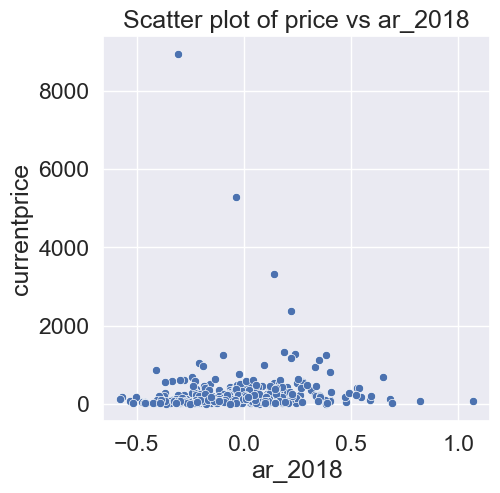

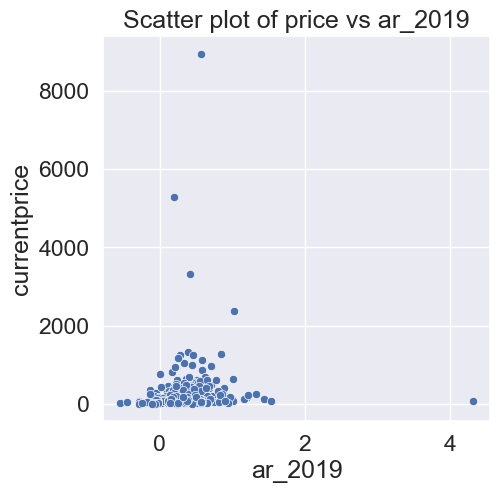

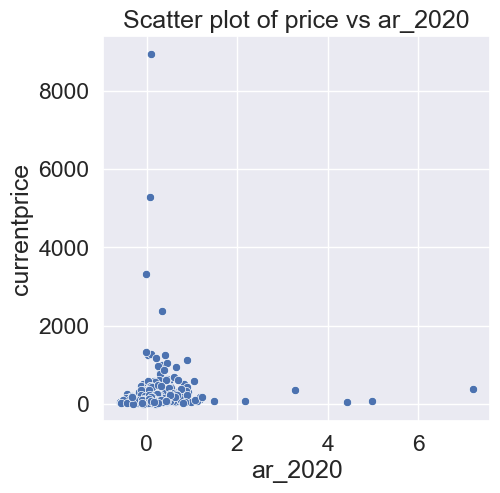

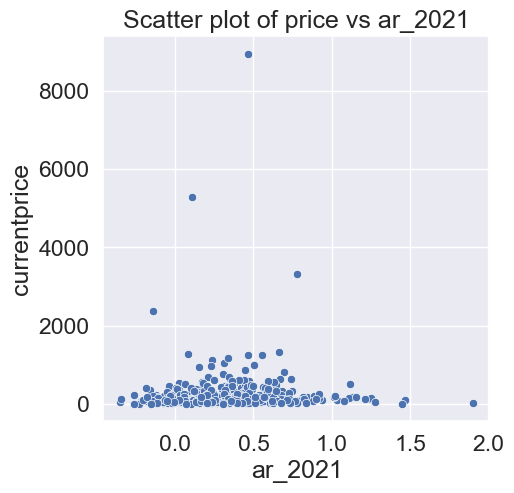

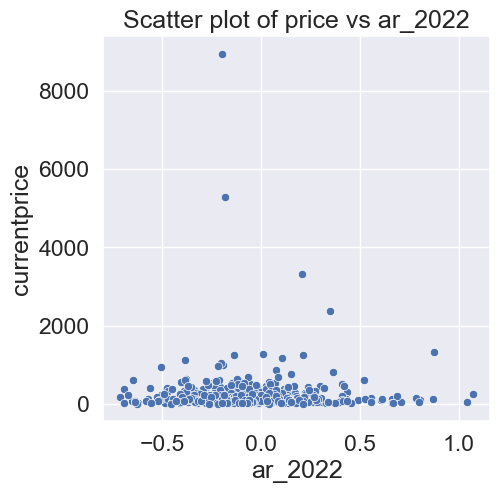

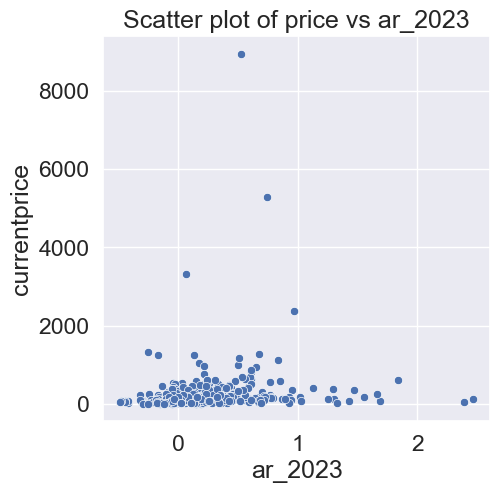

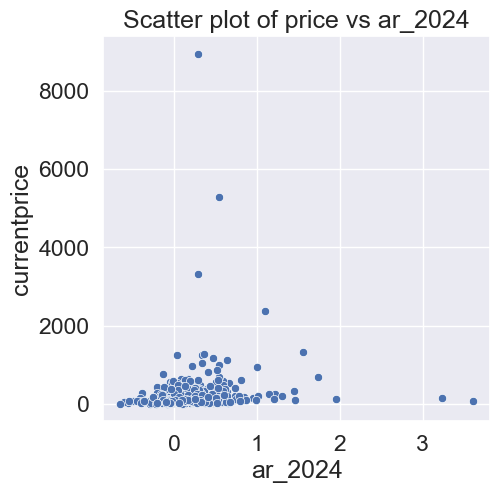

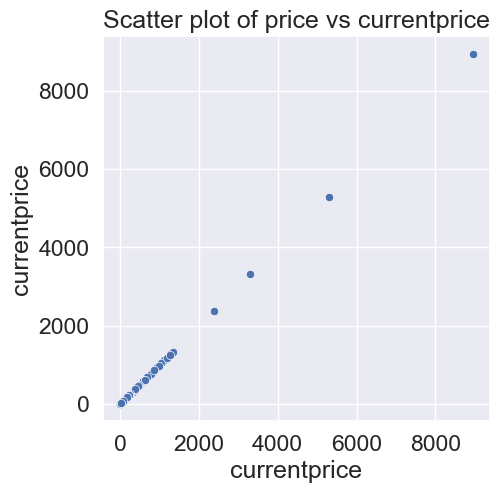

In [36]:
# Plotting scatter plots for each numerical column against 'currentprice' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of price vs ' + col)
    sns.scatterplot(data=defi, x=col, y='currentprice')
    plt.show()

In [37]:
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [38]:
definitive = outlier_slayer(defi)

In [39]:
cat = definitive.select_dtypes(exclude='number')
cat.head(5)

,exchange,symbol,shortname,longname,sector,industry,city,state,country,longbusinesssummary
101,NYQ,SHW,Sherwin-Williams Company (The),The Sherwin-Williams Company,Basic Materials,Specialty Chemicals,Cleveland,OH,United States,The Sherwin-Williams Company engages in the de...
106,NYQ,TT,Trane Technologies plc,Trane Technologies plc,Industrials,Building Products & Equipment,Swords,NaN,Ireland,"Trane Technologies plc, together with its subs..."
108,NMS,CTAS,Cintas Corporation,Cintas Corporation,Industrials,Specialty Business Services,Cincinnati,OH,United States,Cintas Corporation engages in the provision of...
113,NYQ,ICE,Intercontinental Exchange Inc.,"Intercontinental Exchange, Inc.",Financial Services,Financial Data & Stock Exchanges,Atlanta,GA,United States,"Intercontinental Exchange, Inc., together with..."
114,NYQ,APH,Amphenol Corporation,Amphenol Corporation,Technology,Electronic Components,Wallingford,CT,United States,"Amphenol Corporation, together with its subsid..."


In [40]:
num = definitive.select_dtypes(include='number')
num.head(5)

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
101,96953327616,4.399800e+09,0.007,64088.0,0.001706,-0.0012,0.0678,0.5086,-0.0408,0.5017,0.2965,0.4719,-0.2935,0.3159,0.2731,384.96
106,92750389248,3.691200e+09,0.114,40000.0,0.001632,-0.1090,0.3892,0.1985,0.0493,0.4788,0.4189,0.4217,-0.1222,0.4444,0.7268,412.18
108,90222026752,2.450384e+09,0.068,46500.0,0.001588,0.2158,0.3258,0.3543,0.1217,0.6709,0.3190,0.3284,0.0928,0.3988,0.5425,223.71
113,89531416576,5.558000e+09,0.173,12900.0,0.001575,0.1919,0.1366,0.2706,0.0921,0.2447,0.2599,0.2205,-0.2231,0.2634,0.2448,155.93
114,89468313600,3.586300e+09,0.262,95000.0,0.001574,-0.0168,0.3335,0.3136,-0.0682,0.3699,0.2097,0.3731,-0.1098,0.3105,0.5423,74.21


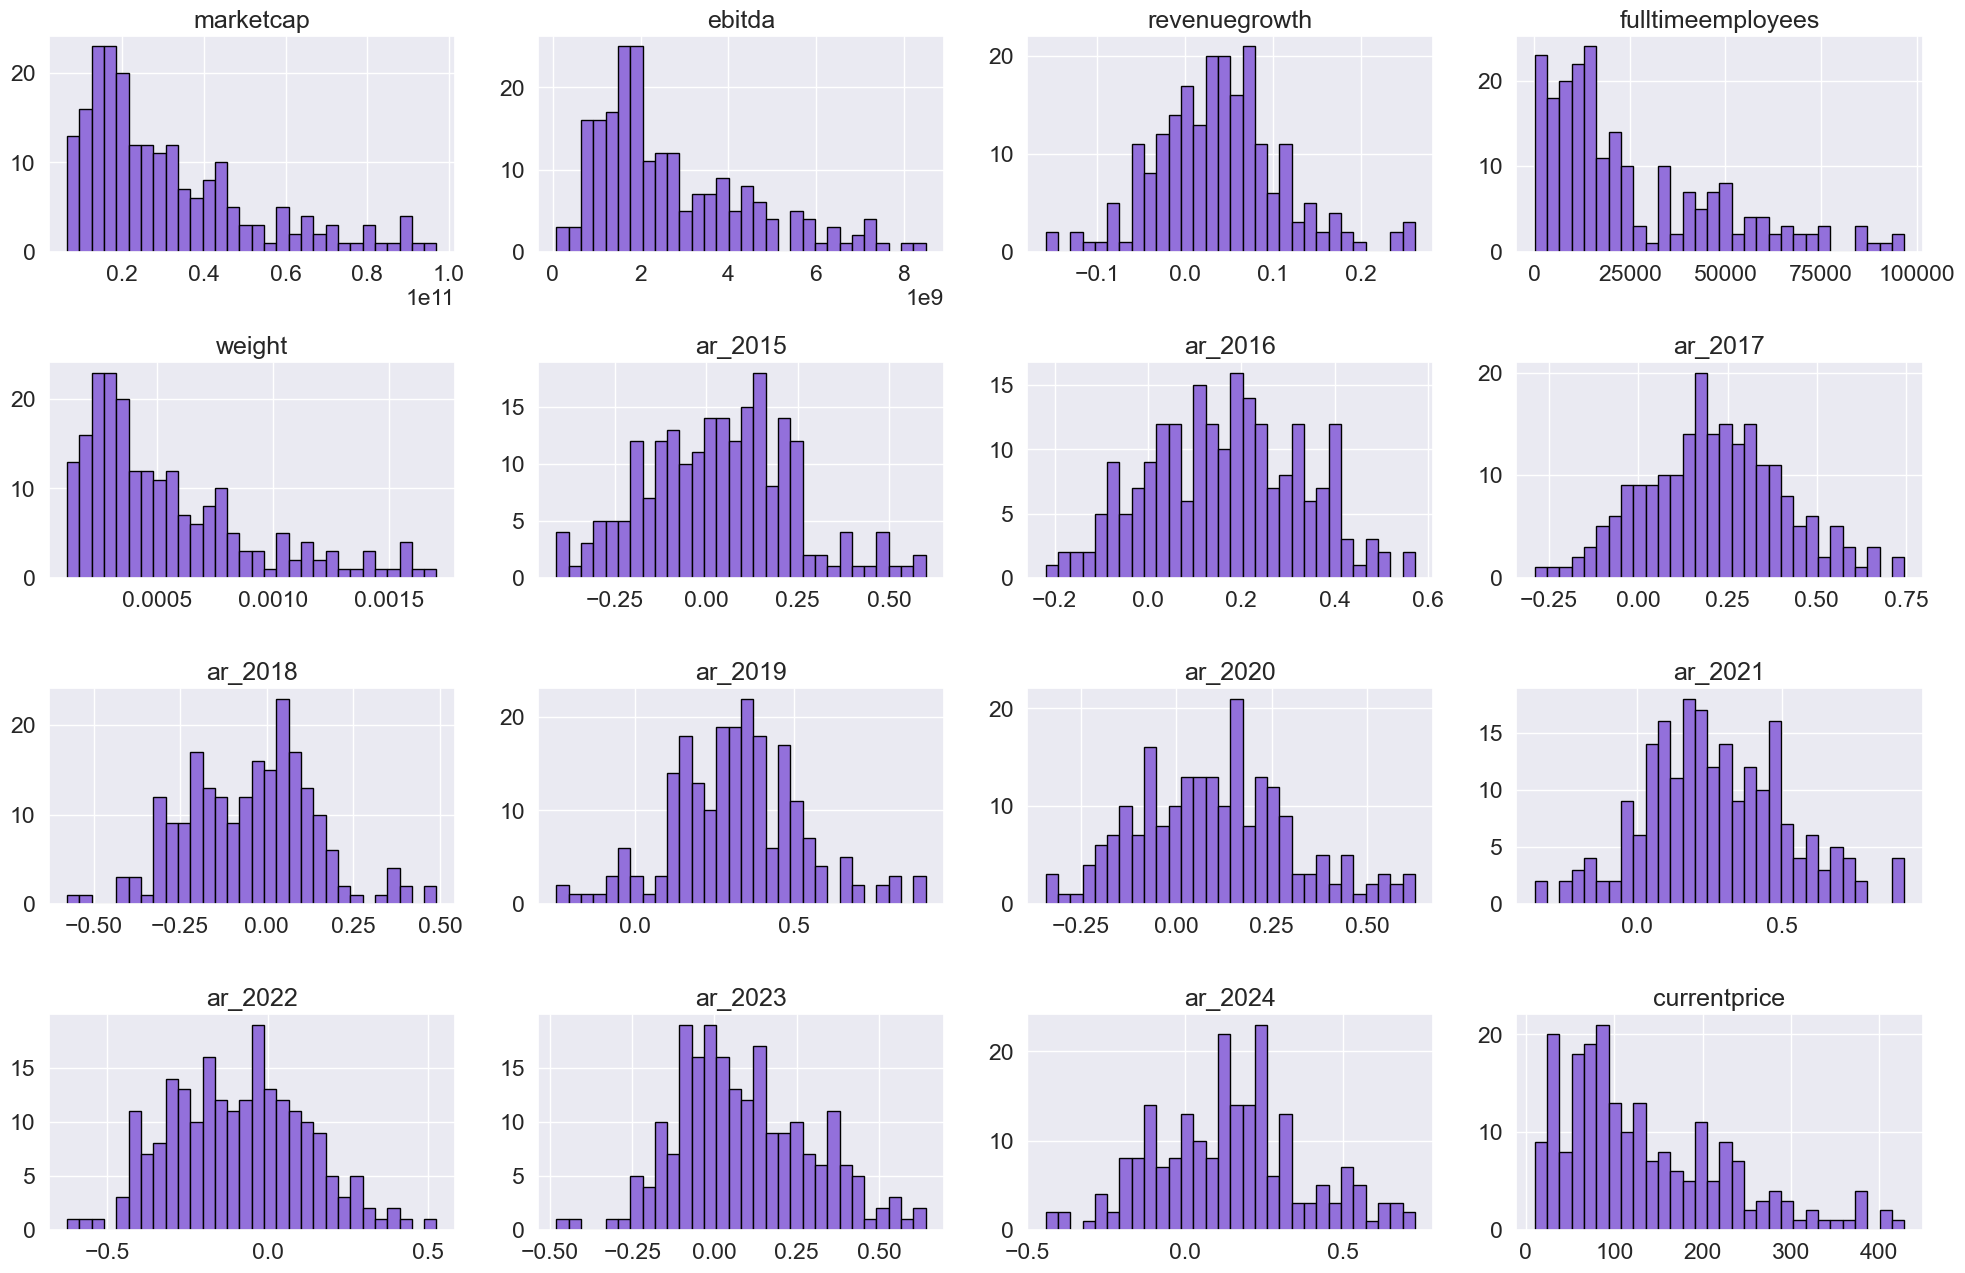

In [41]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

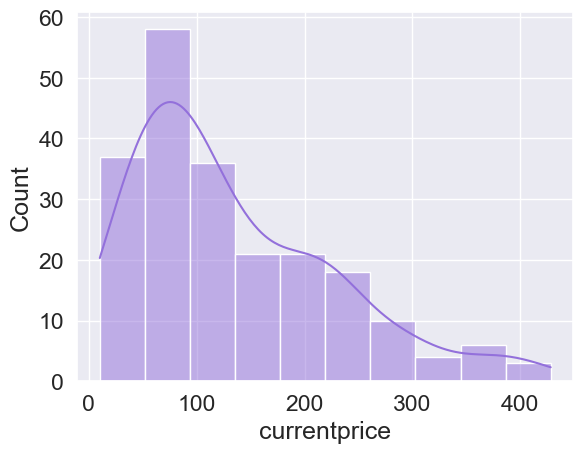

In [43]:
# Dealing with outliers. 
sns.histplot(definitive["currentprice"], color=color, kde=True);

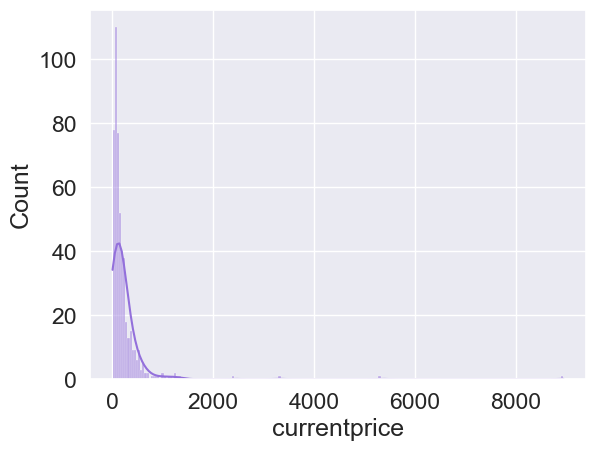

In [44]:
# Without dealing with outliers. 
sns.histplot(defi["currentprice"], color=color, kde=True);

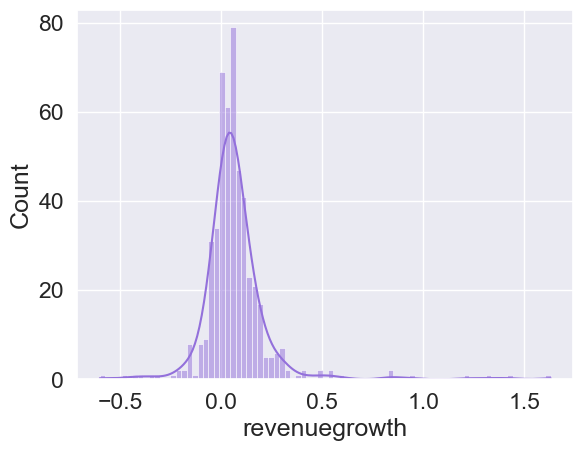

In [45]:
# Without dealing with outliers. REVENUE
sns.histplot(defi["revenuegrowth"], color=color, kde=True);

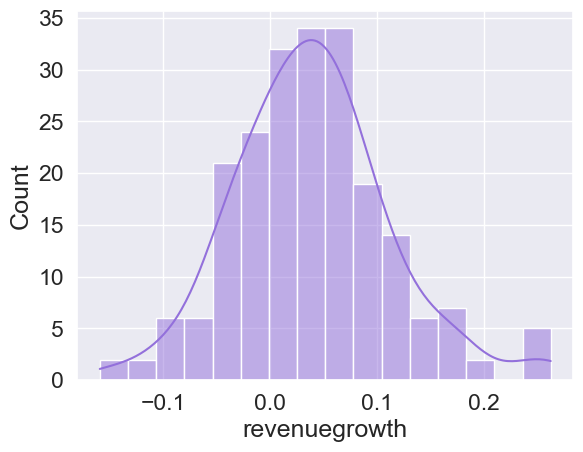

In [46]:
# Dealing with outliers. REVENUE
sns.histplot(definitive["revenuegrowth"], color=color, kde=True);

In [47]:
#pearson 
num.corrwith(definitive['currentprice']).sort_values(ascending=False)

currentprice         1.000000
marketcap            0.363817
weight               0.363817
ar_2023              0.324444
ar_2020              0.283819
revenuegrowth        0.234751
ar_2015              0.218357
ar_2018              0.207666
ar_2024              0.189687
ar_2017              0.183846
ar_2019              0.179808
ar_2021              0.093431
fulltimeemployees    0.092475
ar_2016              0.037581
ar_2022              0.035177
ebitda              -0.026216
dtype: float64

In [49]:
#Spearman
num.corrwith(df['currentprice'], method='spearman').sort_values(ascending=False)[:5]

currentprice    1.000000
marketcap       0.350021
weight          0.350021
ar_2023         0.342151
ar_2020         0.281146
dtype: float64

In [48]:
#pearson 
num.corrwith(definitive['revenuegrowth']).sort_values(ascending=False)

revenuegrowth        1.000000
ar_2024              0.249877
currentprice         0.234751
weight               0.215192
marketcap            0.215192
ar_2018              0.205773
ar_2023              0.093166
ar_2015              0.061707
ar_2022              0.048320
ar_2020              0.039754
ar_2016              0.037034
ar_2017              0.030425
fulltimeemployees    0.021136
ar_2019              0.009050
ebitda              -0.005525
ar_2021             -0.013836
dtype: float64

In [51]:
#Spearman
num.corrwith(df['revenuegrowth'], method='spearman').sort_values(ascending=False)[:5]

revenuegrowth    1.000000
ar_2024          0.266765
currentprice     0.231090
ar_2018          0.229212
marketcap        0.139650
dtype: float64

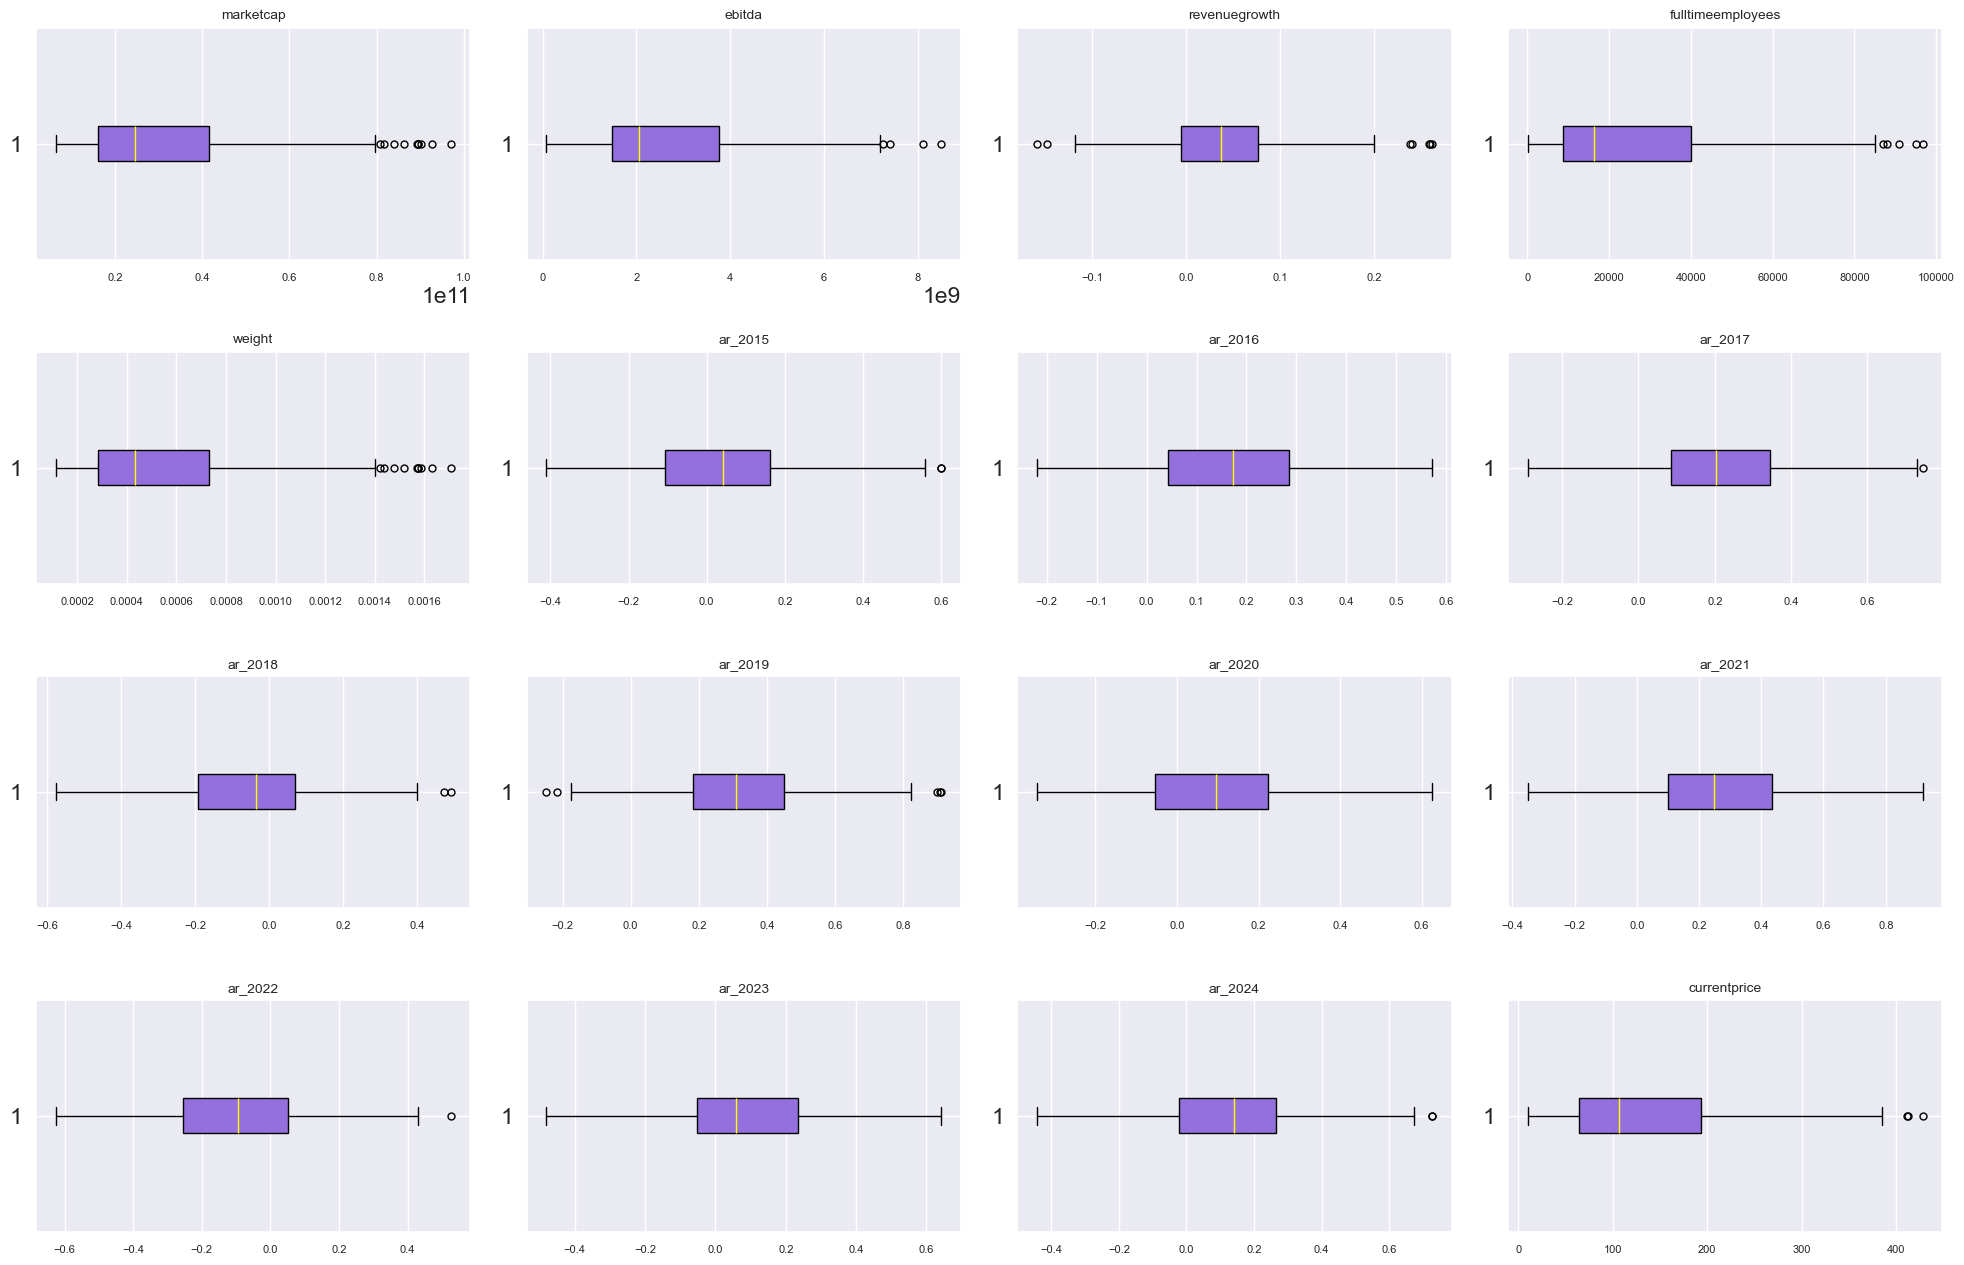

In [52]:
color = '#9370DB'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [53]:
num_corr = num.corr()
num_corr

,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight,ar_2015,ar_2016,ar_2017,ar_2018,ar_2019,ar_2020,ar_2021,ar_2022,ar_2023,ar_2024,currentprice
marketcap,1.000000,0.634697,0.215192,0.318019,1.000000,-0.033238,0.194990,0.137799,0.154273,0.097215,0.155413,0.036532,0.086461,0.252316,0.309398,0.363817
ebitda,0.634697,1.000000,-0.005525,0.363730,0.634697,-0.187406,0.130763,-0.077402,-0.032994,-0.126479,-0.208883,-0.087039,0.275023,-0.047244,0.062795,-0.026216
revenuegrowth,0.215192,-0.005525,1.000000,0.021136,0.215192,0.061707,0.037034,0.030425,0.205773,0.009050,0.039754,-0.013836,0.048320,0.093166,0.249877,0.234751
fulltimeemployees,0.318019,0.363730,0.021136,1.000000,0.318019,-0.089081,0.112328,0.057764,-0.137067,0.005914,0.028392,-0.069613,0.088248,0.009561,0.064857,0.092475
weight,1.000000,0.634697,0.215192,0.318019,1.000000,-0.033238,0.194990,0.137799,0.154273,0.097215,0.155413,0.036532,0.086461,0.252316,0.309398,0.363817
ar_2015,-0.033238,-0.187406,0.061707,-0.089081,-0.033238,1.000000,-0.309867,0.000169,0.051328,0.171207,0.085827,-0.018909,-0.066965,-0.056342,-0.218191,0.218357
ar_2016,0.194990,0.130763,0.037034,0.112328,0.194990,-0.309867,1.000000,0.067262,0.031073,0.060276,0.032110,-0.072256,0.089570,0.076167,0.223795,0.037581
ar_2017,0.137799,-0.077402,0.030425,0.057764,0.137799,0.000169,0.067262,1.000000,0.044333,0.245491,0.345830,-0.021898,-0.244982,0.149332,-0.048142,0.183846
ar_2018,0.154273,-0.032994,0.205773,-0.137067,0.154273,0.051328,0.031073,0.044333,1.000000,0.072484,0.124313,0.078056,-0.069692,-0.094335,-0.039615,0.207666
ar_2019,0.097215,-0.126479,0.009050,0.005914,0.097215,0.171207,0.060276,0.245491,0.072484,1.000000,0.258845,-0.093748,-0.191399,0.138330,-0.070056,0.179808


Text(0.5, 1.0, 'Correlation Heatmap')

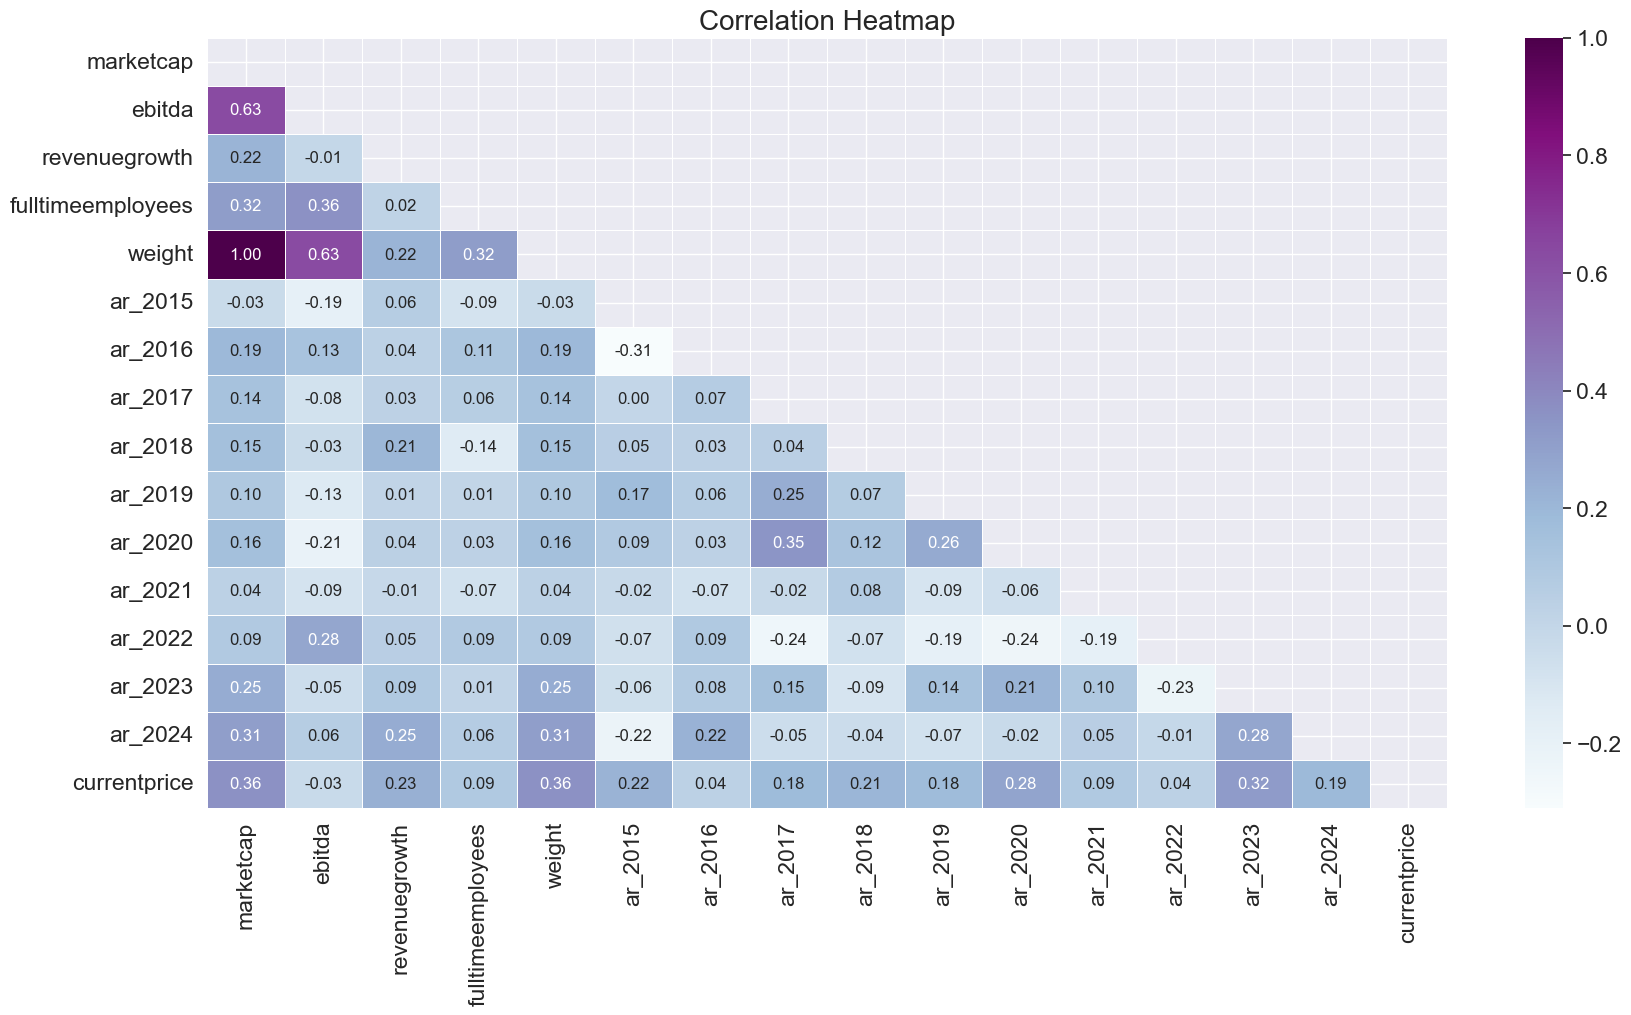

In [54]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

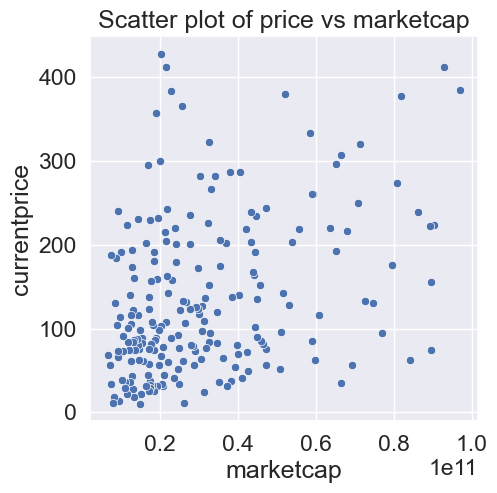

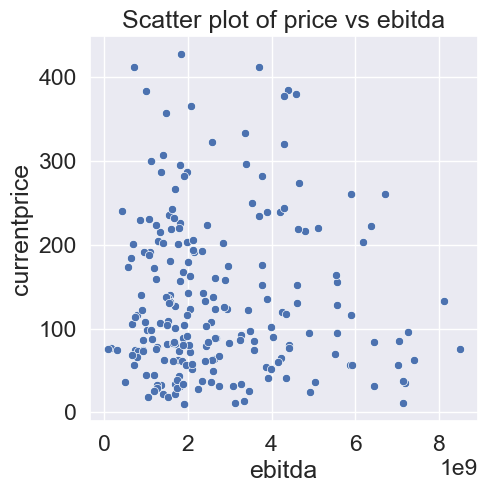

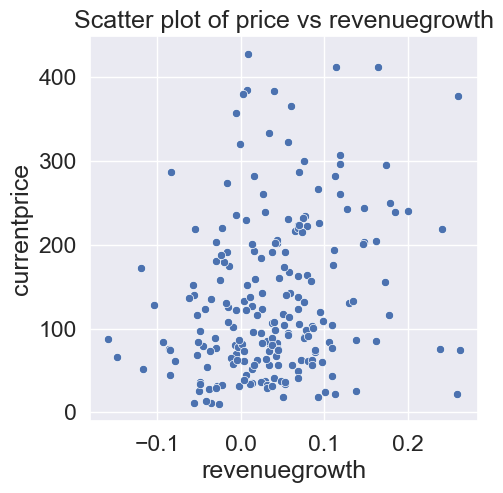

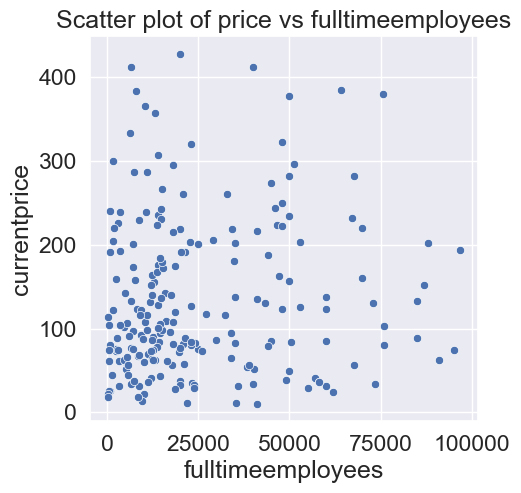

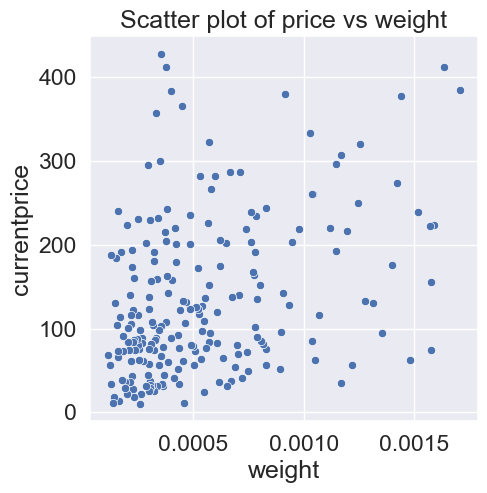

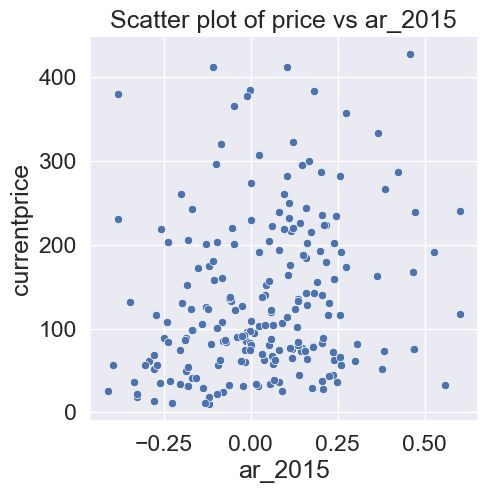

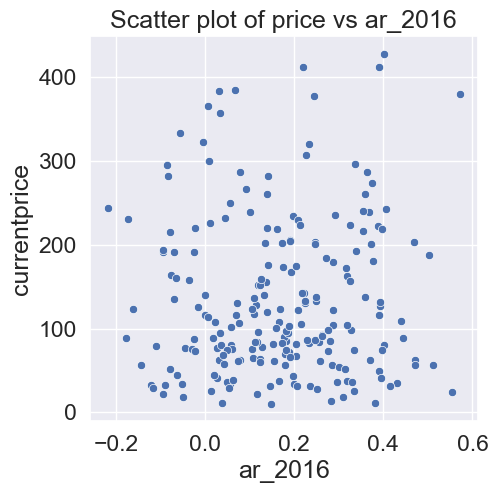

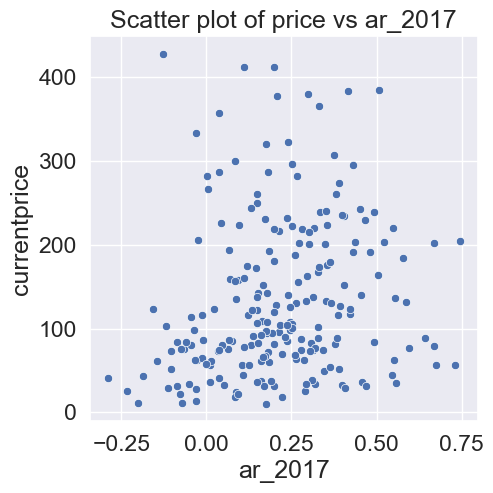

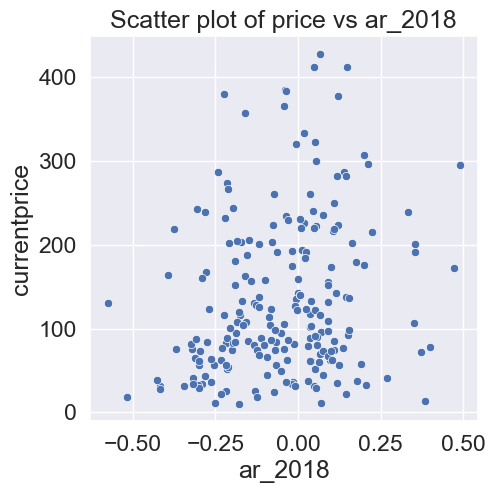

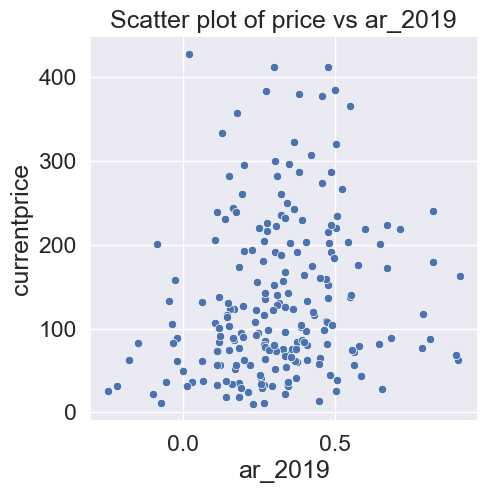

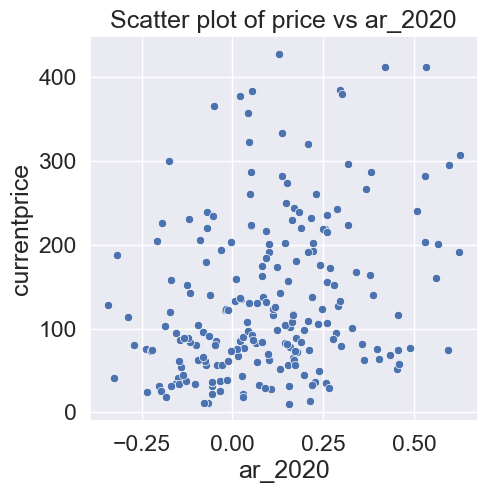

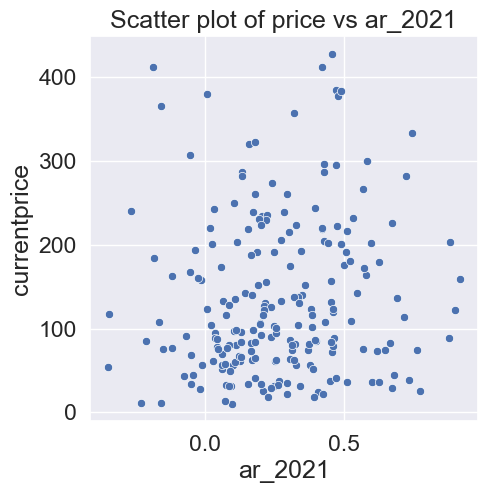

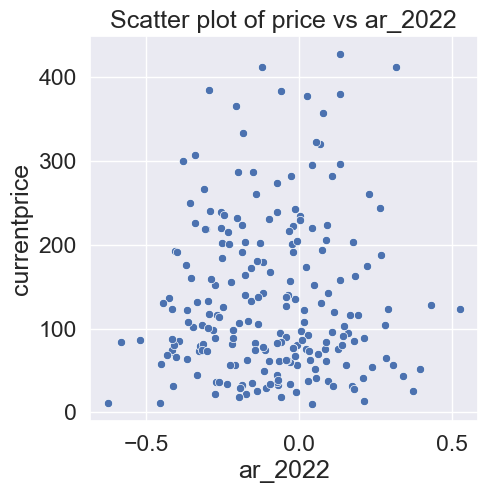

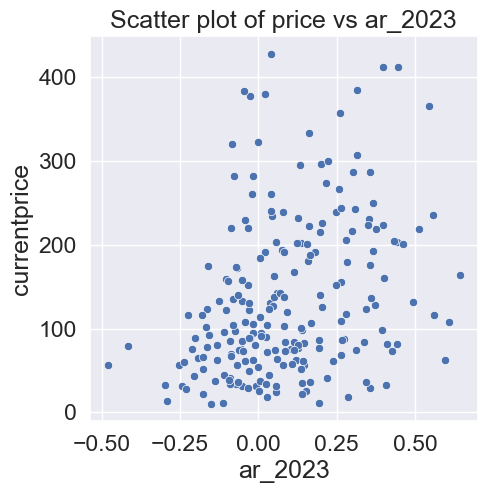

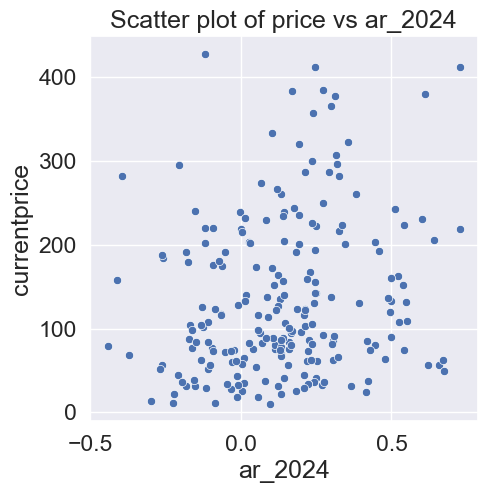

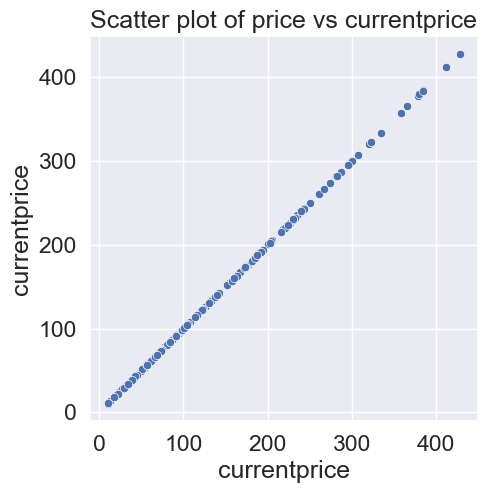

In [55]:
# Plotting scatter plots for each numerical column against 'currentprice' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of price vs ' + col)
    sns.scatterplot(data=definitive, x=col, y='currentprice')
    plt.show()